# 🌏 스토리: “여행 리뷰 탐정단”

> 당신은 국내 최대 여행 플랫폼 **DiscoverKorea**의 AI 리뷰 큐레이터입니다.  
> 최근 여행객들의 솔직한 후기 데이터를 분석해, 숨겨진 인기 코스와 만족도를 높여 줄 여행 팁을 발굴해야 합니다.  
> **여행 리뷰 탐정단**으로서 아래 6가지 단계별 과제를 수행하여, 리뷰 데이터를 전처리하고, 핵심 단어를 추출·시각화하며, 비슷한 후기끼리 묶어보세요.  


## 1. 형태소 분석 & 품사 태깅
- `extended_travel_reviews_dataset`의 리뷰 텍스트를 불러옵니다.  
- **Okt** 또는 **Mecab** 형태소 분석기를 이용해, 각 문장에 등장하는 **명사(Noun)**와 **형용사(Adjective)**만 추출하세요.  
- 미션:  
  - “경치가 정말 아름답고 힐링이 되었어요. 😊” → `['경치', '아름답다', '힐링']`  


In [77]:
import pandas as pd

df = pd.read_csv("travel_reviews_extended.csv")
df.head()

,id,review
0,1,경치가 정말 아름답고 힐링이 되었어요. 😊
1,2,음식이 맛있고 가격도 적당했어요!!!
2,3,숙소가 깨끗하고 위치가 편리했어요.
3,4,직원들이 ㅋㅋ 친절해서 기분 좋았어요.
4,5,교통이 불편해서 이동이 어려웠어요 ㅠㅠ


In [78]:
!pip install konlpy

In [79]:
from konlpy.tag import Okt

okt = Okt()

# Function to extract nouns and adjectives
def extract_nouns_adjectives(text):
    return [word for word, pos in okt.pos(text) if pos in ['Noun', 'Adjective']]

# Apply the function to the 'review' column
df['nouns_adjectives'] = df['review'].apply(extract_nouns_adjectives)
df['nouns_adjectives']

0                 [경치, 정말, 아름답고, 힐링]
1               [음식, 맛있고, 가격, 적당했어요]
2              [숙소, 깨끗하고, 위치, 편리했어요]
3               [직원, 친절해서, 기분, 좋았어요]
4              [교통, 불편해서, 이동, 어려웠어요]
5              [서비스, 좋아서, 다음, 또, 방문]
6              [청결, 상태, 매우, 만족스러웠어요]
7          [분위기, 아늑하고, 사진, 찍기, 좋았어요]
8            [가격, 대비, 성능, 정말, 훌륭했어요]
9             [주변, 관광지, 가까워서, 편리했어요]
10             [조식, 메뉴, 다양하고, 맛있었어요]
11          [객실, 넓어서, 편안하게, 수, 있었어요]
12                     [야경, 멋져서, 추천]
13           [예약, 과정, 간편하고, 빠르게, 완료]
14           [와이파이, 속도, 빨, 업무, 좋았어요]
15          [수영장, 깨끗해서, 가족, 즐거운, 시간]
16       [화장실, 물때, 좀, 있었지만, 전반, 좋았다]
17              [주차, 공간, 넉넉해서, 편했어요]
18    [가격, 조금, 비싸지만, 서비스, 좋아서, 만족한다]
19               [방문객, 명, 이상, 추천, 곳]
Name: nouns_adjectives, dtype: object

## 2. 텍스트 정제(클리닝)
- 원본 리뷰에는 숫자(예: “100명 이상”), 특수문자(“!!!”, “#추천”), 이모지(“😊”, “👍”)와 과도한 공백이 섞여 있습니다.  
- **정규표현식**을 활용해 아래 과정을 수행하세요:  
  1. 숫자·특수문자·이모지를 모두 제거  
  2. 여러 개의 공백(`\s+`)을 하나의 공백으로 통일  
- 미션:  
  - “숙소가   깨끗하고    위치가 편리했어요.” → “숙소가 깨끗하고 위치가 편리했어요”  


In [80]:
import re

# Function to clean text
def clean_text(text):
    # Remove numbers, special characters, and emojis
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)      # Remove numbers
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning function to the 'review' column
df['cleaned_review'] = df['review'].apply(clean_text)
df[['review', 'cleaned_review']]

,review,cleaned_review
0,경치가 정말 아름답고 힐링이 되었어요. 😊,경치가 정말 아름답고 힐링이 되었어요
1,음식이 맛있고 가격도 적당했어요!!!,음식이 맛있고 가격도 적당했어요
2,숙소가 깨끗하고 위치가 편리했어요.,숙소가 깨끗하고 위치가 편리했어요
3,직원들이 ㅋㅋ 친절해서 기분 좋았어요.,직원들이 ㅋㅋ 친절해서 기분 좋았어요
4,교통이 불편해서 이동이 어려웠어요 ㅠㅠ,교통이 불편해서 이동이 어려웠어요 ㅠㅠ
5,서비스가 좋아서 다음에 또 방문하고 싶다.,서비스가 좋아서 다음에 또 방문하고 싶다
6,청결 상태가 매우 만족스러웠어요ㅋㅋ,청결 상태가 매우 만족스러웠어요ㅋㅋ
7,분위기가 아늑하고 사진 찍기 좋았어요👍,분위기가 아늑하고 사진 찍기 좋았어요
8,가격 대비 성능이 정말 훌륭했어요.,가격 대비 성능이 정말 훌륭했어요
9,주변 관광지가 가까워서 편리했어요. #추천,주변 관광지가 가까워서 편리했어요 추천


## 3. 불용어(stopwords) 제거
- 여행 리뷰에 자주 등장하지만 의미를 크게 더해주지 않는 단어들을 제거해야 합니다.  
- 예시 불용어 목록: `{'정말', '것', '있다', 'ㅋㅋ'}`  
- **형태소 분석 결과**에서 위 불용어를 필터링하여 제거하세요.  
- 미션:  
  - `['교통', '불편하다', '이동', '어렵다', '정말']` → `['교통', '불편하다', '이동', '어렵다']`  


In [81]:
stop_words = "정말 것 있다 ㅋㅋ 명 또 수 빨 전반 명 곳 이상 조금"
stop_words = stop_words.split()
# Function to remove stop words
def remove_stop_words(text):
    return [word for word in text if word not in stop_words]
# Apply the stop word removal function
df['filtered_nouns_adjectives'] = df['nouns_adjectives'].apply(remove_stop_words)
df[['nouns_adjectives', 'filtered_nouns_adjectives']]

,nouns_adjectives,filtered_nouns_adjectives
0,"[경치, 정말, 아름답고, 힐링]","[경치, 아름답고, 힐링]"
1,"[음식, 맛있고, 가격, 적당했어요]","[음식, 맛있고, 가격, 적당했어요]"
2,"[숙소, 깨끗하고, 위치, 편리했어요]","[숙소, 깨끗하고, 위치, 편리했어요]"
3,"[직원, 친절해서, 기분, 좋았어요]","[직원, 친절해서, 기분, 좋았어요]"
4,"[교통, 불편해서, 이동, 어려웠어요]","[교통, 불편해서, 이동, 어려웠어요]"
5,"[서비스, 좋아서, 다음, 또, 방문]","[서비스, 좋아서, 다음, 방문]"
6,"[청결, 상태, 매우, 만족스러웠어요]","[청결, 상태, 매우, 만족스러웠어요]"
7,"[분위기, 아늑하고, 사진, 찍기, 좋았어요]","[분위기, 아늑하고, 사진, 찍기, 좋았어요]"
8,"[가격, 대비, 성능, 정말, 훌륭했어요]","[가격, 대비, 성능, 훌륭했어요]"
9,"[주변, 관광지, 가까워서, 편리했어요]","[주변, 관광지, 가까워서, 편리했어요]"


In [82]:
df ['nouns_adjectives'] = df['filtered_nouns_adjectives']
df['nouns_adjectives'] 
df.drop (columns=['filtered_nouns_adjectives'], inplace=True)
df.drop (columns=['review'], inplace=True)
df.drop (columns=['cleaned_review'], inplace=True)
df

,id,nouns_adjectives
0,1,"[경치, 아름답고, 힐링]"
1,2,"[음식, 맛있고, 가격, 적당했어요]"
2,3,"[숙소, 깨끗하고, 위치, 편리했어요]"
3,4,"[직원, 친절해서, 기분, 좋았어요]"
4,5,"[교통, 불편해서, 이동, 어려웠어요]"
5,6,"[서비스, 좋아서, 다음, 방문]"
6,7,"[청결, 상태, 매우, 만족스러웠어요]"
7,8,"[분위기, 아늑하고, 사진, 찍기, 좋았어요]"
8,9,"[가격, 대비, 성능, 훌륭했어요]"
9,10,"[주변, 관광지, 가까워서, 편리했어요]"


## 4. Bag-of-Words & Term-Document Matrix 생성
- 불용어 제거까지 마친 코퍼스를 공백으로 이어붙인 문자열 리스트를 준비합니다.  
- `sklearn.feature_extraction.text.CountVectorizer`를 이용해 **문서×단어 행렬**(DTM)을 생성하세요.  
- 생성된 DTM의 **크기(shape)**와 `vocabulary_`(단어 ↔ 열 인덱스) 일부를 출력해 확인합니다.  


In [83]:
from sklearn.feature_extraction.text import CountVectorizer

# Prepare the corpus by joining the words in 'nouns_adjectives' with spaces
corpus = df['nouns_adjectives'].apply(lambda x: ' '.join(x))

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the corpus to create the DTM
dtm = vectorizer.fit_transform(corpus)

# Print the shape of the DTM
print("DTM Shape:", dtm.shape)

# Print a sample of the vocabulary
print("Vocabulary Sample:", dict(list(vectorizer.vocabulary_.items())))

DTM Shape: (20, 72)
Vocabulary Sample: {'경치': 5, '아름답고': 41, '힐링': 71, '음식': 49, '맛있고': 20, '가격': 0, '적당했어요': 53, '숙소': 38, '깨끗하고': 11, '위치': 48, '편리했어요': 66, '직원': 61, '친절해서': 65, '기분': 10, '좋았어요': 57, '교통': 9, '불편해서': 29, '이동': 50, '어려웠어요': 43, '서비스': 34, '좋아서': 55, '다음': 16, '방문': 26, '청결': 63, '상태': 33, '매우': 22, '만족스러웠어요': 18, '분위기': 28, '아늑하고': 40, '사진': 32, '찍기': 62, '대비': 17, '성능': 35, '훌륭했어요': 70, '주변': 58, '관광지': 8, '가까워서': 1, '조식': 54, '메뉴': 24, '다양하고': 15, '맛있었어요': 21, '객실': 4, '넓어서': 14, '편안하게': 67, '있었어요': 51, '야경': 42, '멋져서': 23, '추천': 64, '예약': 45, '과정': 7, '간편하고': 3, '빠르게': 31, '완료': 47, '와이파이': 46, '속도': 36, '업무': 44, '수영장': 37, '깨끗해서': 12, '가족': 2, '즐거운': 60, '시간': 39, '화장실': 69, '물때': 25, '있었지만': 52, '좋았다': 56, '주차': 59, '공간': 6, '넉넉해서': 13, '편했어요': 68, '비싸지만': 30, '만족한다': 19, '방문객': 27}


## 5. 상위 20개 단어 시각화
- DTM으로부터 각 단어의 전체 등장 빈도를 계산합니다.  
- 빈도 상위 20개 단어를 **막대그래프**로 시각화하여, 여행객들이 자주 언급한 핵심 키워드를 한눈에 파악하세요.  
- (선택) 워드클라우드로도 표현해 보는 것을 권장합니다.  


In [84]:
sorted_items = sorted(vectorizer.vocabulary_.items(), key=lambda x: x[1], reverse=True)
sorted_items[:20]

[('힐링', 71),
 ('훌륭했어요', 70),
 ('화장실', 69),
 ('편했어요', 68),
 ('편안하게', 67),
 ('편리했어요', 66),
 ('친절해서', 65),
 ('추천', 64),
 ('청결', 63),
 ('찍기', 62),
 ('직원', 61),
 ('즐거운', 60),
 ('주차', 59),
 ('주변', 58),
 ('좋았어요', 57),
 ('좋았다', 56),
 ('좋아서', 55),
 ('조식', 54),
 ('적당했어요', 53),
 ('있었지만', 52)]

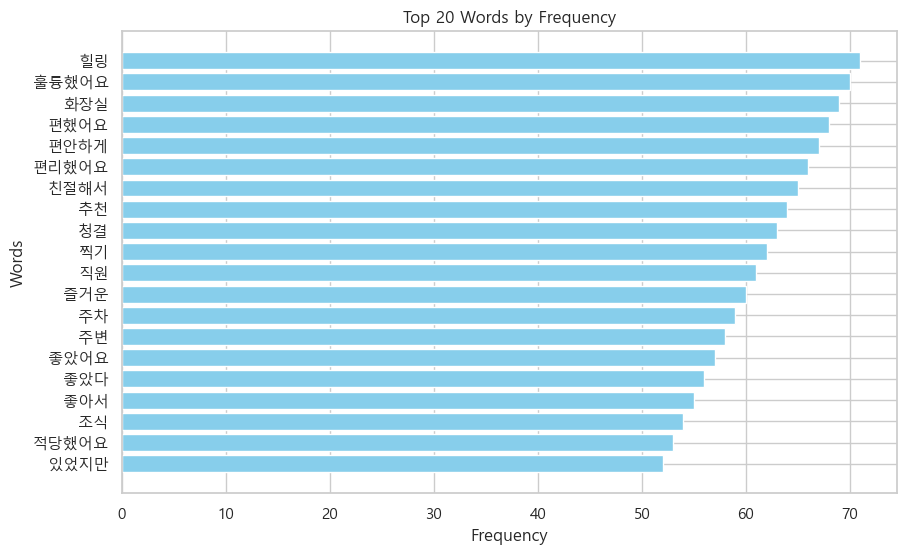

In [85]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')  # '맑은 고딕' 폰트 사용
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

top_words = sorted_items[:20]

# Extract words and their counts
words = [item[0] for item in top_words]
counts = [item[1] for item in top_words]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Words by Frequency')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

## 6. TDM을 활용한 유사 문서 탐색 문제
- 4번에서 생성한 TDM을 이용해 **코사인 유사도** 행렬을 계산하세요.  
- 각 리뷰 문서별로 **자기 자신을 제외한** 상위 2개의 유사 문서를 찾아, **(리뷰 ID, 유사도 점수)** 형태로 정리합니다.  
- 결과를 표로 작성하고, 유사도가 높게 나온 **문서 쌍 2개**를 골라, 왜 이 두 리뷰가 서로 유사도가 높았는지 간단히 설명하세요.  

> **결과 예시**  
> ```
> 리뷰 1 유사 문서: [(ID 5, 0.854), (ID 8, 0.832)]
> 리뷰 2 유사 문서: [(ID 3, 0.791), (ID 10, 0.754)]
> ```  


In [103]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 1. 단어 리스트를 문자열로 변환 (예: ['경치', '아름답고'] → '경치 아름답고')
corpus = df['nouns_adjectives'].apply(lambda x: ' '.join(x))

# 2. TF-IDF 벡터화
vectorizer = TfidfVectorizer()
tdm = vectorizer.fit_transform(corpus)

# 3. 코사인 유사도 행렬 계산
cosine_sim = cosine_similarity(tdm)
cosine_sim_df = pd.DataFrame(cosine_sim, index=df.index, columns=df.index)

# 4. 유사도 0.0일 경우 ID를 -1로 치환하는 유사 문서 추출 함수
def get_top_2_similar_documents_with_filter(cosine_sim_df):
    result = []
    for idx in cosine_sim_df.index:
        top2 = cosine_sim_df.loc[idx].drop(idx).nlargest(2)

        sim1_id = int(top2.index[0]) + 1  # 실제 리뷰 ID는 1부터 시작
        sim1_score = round(top2.iloc[0], 3)
        sim1_words = df.loc[top2.index[0], 'nouns_adjectives']
        sim2_id = int(top2.index[1]) + 1
        sim2_score = round(top2.iloc[1], 3)
        sim2_words = df.loc[top2.index[1], 'nouns_adjectives']

        result.append({
            "리뷰 ID": idx + 1,
            "원본 리뷰 단어": df.loc[idx, 'nouns_adjectives'],
            "유사 문서 1": (sim1_id, sim1_score),
            "유사 문서 1 단어": sim1_words,
            "유사 문서 2": (sim2_id, sim2_score),
            "유사 문서 2 단어": sim2_words
        })
    return pd.DataFrame(result)

# 5. 실행
top2_sim_result = get_top_2_similar_documents_with_filter(cosine_sim_df)

top2_sim_result


,리뷰 ID,원본 리뷰 단어,유사 문서 1,유사 문서 1 단어,유사 문서 2,유사 문서 2 단어
0,1,"[경치, 아름답고, 힐링]","(2, 0.0)","[음식, 맛있고, 가격, 적당했어요]","(3, 0.0)","[숙소, 깨끗하고, 위치, 편리했어요]"
1,2,"[음식, 맛있고, 가격, 적당했어요]","(9, 0.173)","[가격, 대비, 성능, 훌륭했어요]","(19, 0.162)","[가격, 비싸지만, 서비스, 좋아서, 만족한다]"
2,3,"[숙소, 깨끗하고, 위치, 편리했어요]","(10, 0.205)","[주변, 관광지, 가까워서, 편리했어요]","(1, 0.0)","[경치, 아름답고, 힐링]"
3,4,"[직원, 친절해서, 기분, 좋았어요]","(15, 0.173)","[와이파이, 속도, 업무, 좋았어요]","(8, 0.153)","[분위기, 아늑하고, 사진, 찍기, 좋았어요]"
4,5,"[교통, 불편해서, 이동, 어려웠어요]","(1, 0.0)","[경치, 아름답고, 힐링]","(2, 0.0)","[음식, 맛있고, 가격, 적당했어요]"
5,6,"[서비스, 좋아서, 다음, 방문]","(19, 0.402)","[가격, 비싸지만, 서비스, 좋아서, 만족한다]","(1, 0.0)","[경치, 아름답고, 힐링]"
6,7,"[청결, 상태, 매우, 만족스러웠어요]","(1, 0.0)","[경치, 아름답고, 힐링]","(2, 0.0)","[음식, 맛있고, 가격, 적당했어요]"
7,8,"[분위기, 아늑하고, 사진, 찍기, 좋았어요]","(4, 0.153)","[직원, 친절해서, 기분, 좋았어요]","(15, 0.153)","[와이파이, 속도, 업무, 좋았어요]"
8,9,"[가격, 대비, 성능, 훌륭했어요]","(2, 0.173)","[음식, 맛있고, 가격, 적당했어요]","(19, 0.162)","[가격, 비싸지만, 서비스, 좋아서, 만족한다]"
9,10,"[주변, 관광지, 가까워서, 편리했어요]","(3, 0.205)","[숙소, 깨끗하고, 위치, 편리했어요]","(1, 0.0)","[경치, 아름답고, 힐링]"
